# Lab: Data Analysis with APIs from the Provided List

## Jikan API (Unofficial MyAnimeList API)
**Link:** https://jikan.moe/

In [475]:
import pandas as pd
import requests
import json
import io
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Anime Data

In [6]:
# anime_id = 1
# url = f"https://api.jikan.moe/v4/anime/{anime_id}/full"
# res = requests.get(url)
# if res.status_code == 200:
#     animes = res.json()
#     print(json.dumps(animes, indent=4))

In [7]:
animes_data = []

for anime_id in range(1,1000):
    url = f"https://api.jikan.moe/v4/anime/{anime_id}"
    res = requests.get(url)
    if res.status_code == 200:
        animes = res.json()
        data = {
            "title": animes['data']['title'],
            "type": animes['data']['type'],
            "source": animes['data']['source'],
            "genre": animes['data']['genres'][0]['name'],
            "episodes": animes['data']['episodes'],
            "airing period": animes['data']['aired']['string'],
            "duration": animes['data']['duration'],
            "score": animes['data']['score'],
            "rank": animes['data']['rank'],
            "popularity": animes['data']['popularity'],
        }
        animes_data.append(data)
        
df = pd.DataFrame(animes_data)

In [8]:
# Create a csv file
df.to_csv("anime.csv")

In [9]:
# Load a csv file
anime_df = pd.read_csv("anime.csv")
anime_df.head()

,Unnamed: 0,title,type,source,genre,episodes,airing period,duration,score,rank,popularity
0,0,Cowboy Bebop,TV,Original,Action,26.0,"Apr 3, 1998 to Apr 24, 1999",24 min per ep,8.75,49.0,43
1,1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,Action,1.0,"Sep 1, 2001",1 hr 55 min,8.38,207.0,633
2,2,Trigun,TV,Manga,Action,26.0,"Apr 1, 1998 to Sep 30, 1998",24 min per ep,8.22,363.0,259
3,3,Witch Hunter Robin,TV,Original,Action,26.0,"Jul 3, 2002 to Dec 25, 2002",25 min per ep,7.24,3084.0,1911
4,4,Eyeshield 21,TV,Manga,Sports,145.0,"Apr 6, 2005 to Mar 19, 2008",23 min per ep,7.91,791.0,1334


## Data Cleaning

In [11]:
# Drop a column
anime_df = anime_df.drop("Unnamed: 0",axis=1)

In [12]:
anime_df.head()

,title,type,source,genre,episodes,airing period,duration,score,rank,popularity
0,Cowboy Bebop,TV,Original,Action,26.0,"Apr 3, 1998 to Apr 24, 1999",24 min per ep,8.75,49.0,43
1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,Action,1.0,"Sep 1, 2001",1 hr 55 min,8.38,207.0,633
2,Trigun,TV,Manga,Action,26.0,"Apr 1, 1998 to Sep 30, 1998",24 min per ep,8.22,363.0,259
3,Witch Hunter Robin,TV,Original,Action,26.0,"Jul 3, 2002 to Dec 25, 2002",25 min per ep,7.24,3084.0,1911
4,Eyeshield 21,TV,Manga,Sports,145.0,"Apr 6, 2005 to Mar 19, 2008",23 min per ep,7.91,791.0,1334


In [13]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          706 non-null    object 
 1   type           706 non-null    object 
 2   source         706 non-null    object 
 3   genre          706 non-null    object 
 4   episodes       705 non-null    float64
 5   airing period  706 non-null    object 
 6   duration       706 non-null    object 
 7   score          706 non-null    float64
 8   rank           683 non-null    float64
 9   popularity     706 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 55.3+ KB


In [14]:
# Check if there is any missing values
anime_df.isnull().sum()

title             0
type              0
source            0
genre             0
episodes          1
airing period     0
duration          0
score             0
rank             23
popularity        0
dtype: int64

In [15]:
anime_df[anime_df['episodes'].isnull() == True]

,title,type,source,genre,episodes,airing period,duration,score,rank,popularity
677,Crayon Shin-chan,TV,Manga,Comedy,NaN,"Apr 13, 1992 to ?",21 min,7.8,1016.0,2363


In [19]:
anime_df['episodes'].fillna('1259', inplace=True)

In [23]:
anime_df['rank'].fillna(0, inplace=True)

In [25]:
anime_df.isnull().sum()

title            0
type             0
source           0
genre            0
episodes         0
airing period    0
duration         0
score            0
rank             0
popularity       0
dtype: int64

In [27]:
anime_df['rank'] = anime_df['rank'].astype(int)
anime_df['episodes'] = anime_df['episodes'].astype(int)

In [100]:
# Check for any duplicated rows
anime_df[anime_df.duplicated()]

,title,type,source,genre,episodes,airing period,duration,score,rank,popularity


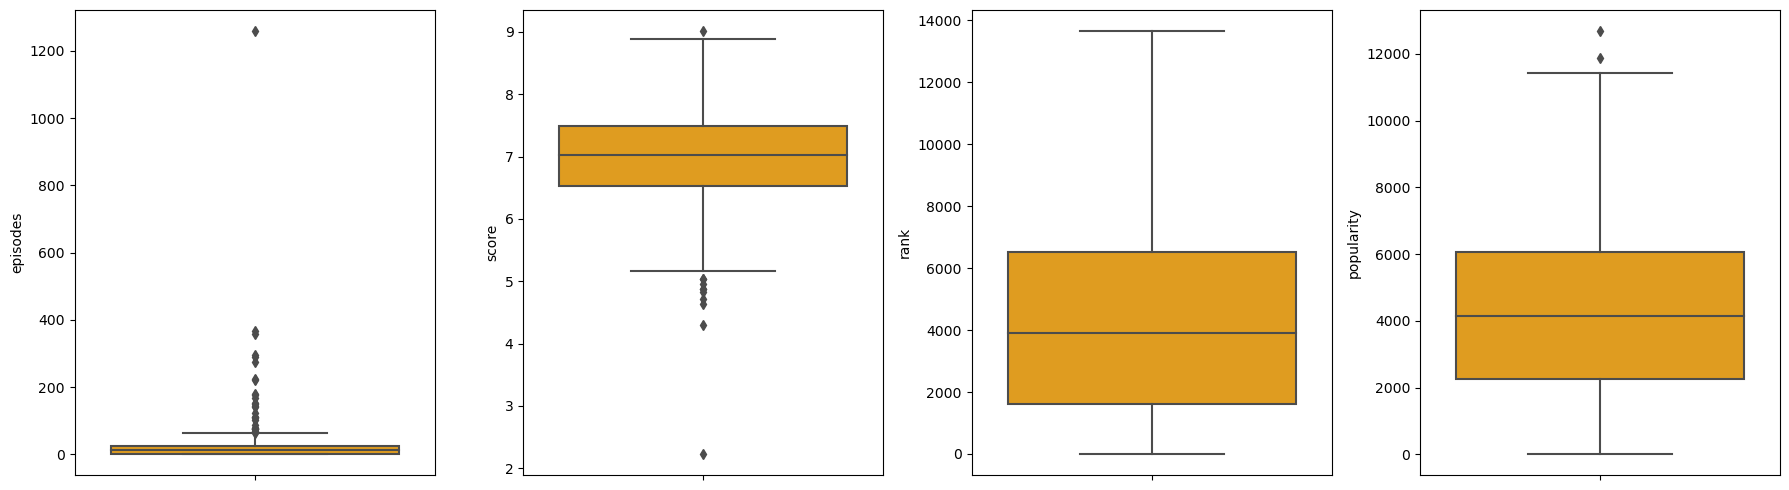

In [166]:
# Check for any outliers
outlier_df = anime_df.select_dtypes(exclude=['object'])
fig, ax = plt.subplots(nrows=1, ncols=len(outlier_df.columns), figsize=(18, 5))
for index, column in enumerate(outlier_df):
    sns.boxplot(data=outlier_df, y=outlier_df[column], ax=ax[index], color='orange')
    
plt.tight_layout()
plt.show()

* **Since one of the animes is still ongoing, I can confirm that there is an outlier at the farthest point.**

## Exploratory Data Analysis (EDA)

### Distribution by Categories

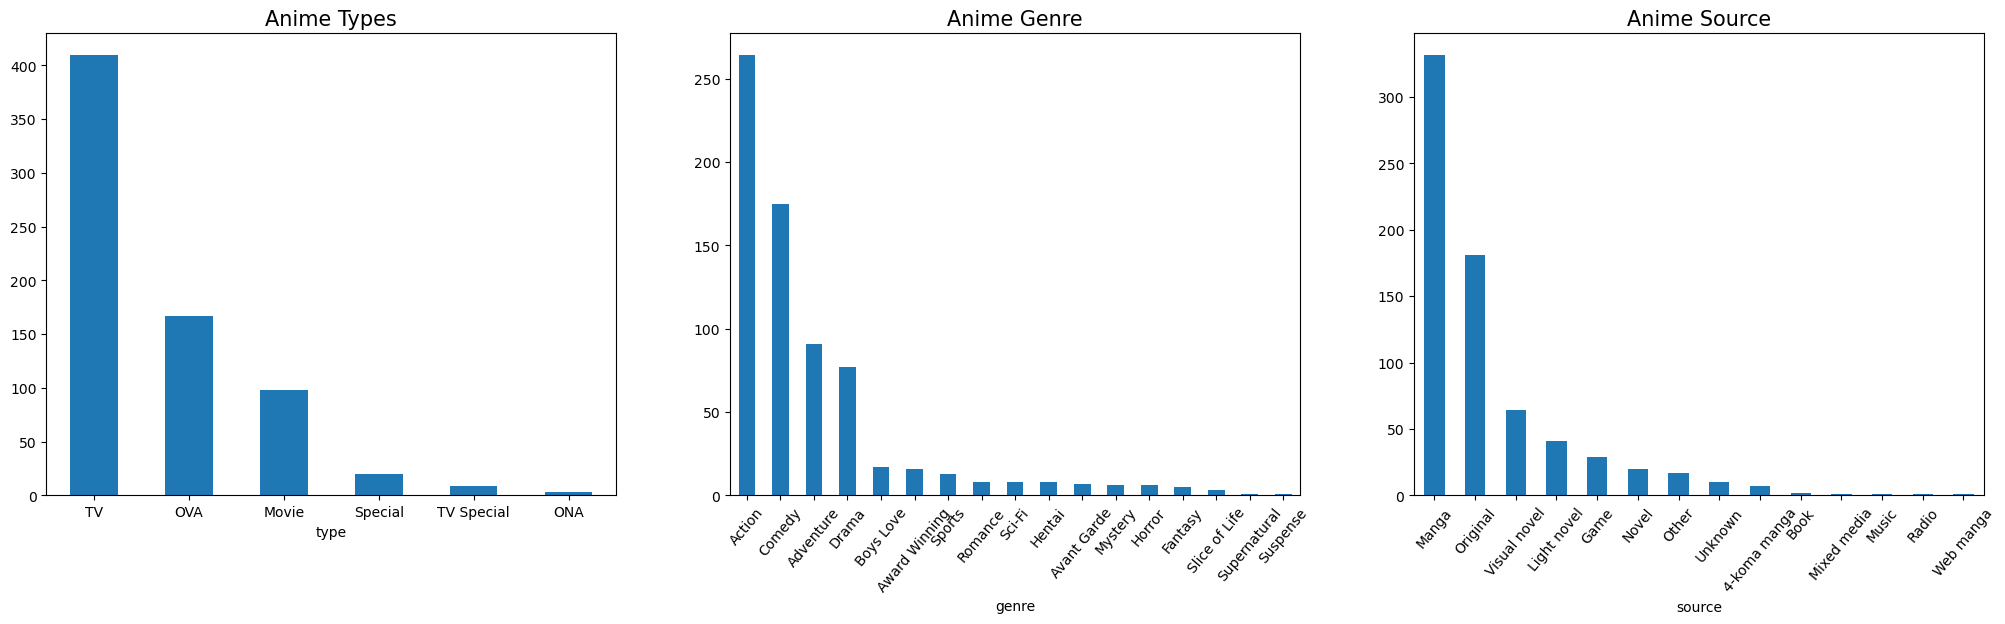

In [536]:
# Count each anime type
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
type = anime_df.groupby('type')['type'].count().sort_values(ascending=False)
type.plot(kind='bar')
plt.title("Anime Types", fontsize=15)
plt.xticks(rotation = 360, fontsize = 10)

# Count each anime genre
plt.subplot(1,3,2)
genre = anime_df.groupby('genre')['genre'].count().sort_values(ascending=False)
genre.plot(kind="bar")
plt.title("Anime Genre", fontsize=15)
plt.xticks(rotation = 50, fontsize = 10)

# Count each anime source
plt.subplot(1,3,3)
source = anime_df.groupby('source')['source'].count().sort_values(ascending=False)
source.plot(kind="bar")
plt.title("Anime Source", fontsize=15)
plt.xticks(rotation = 50, fontsize = 10)

plt.show()

In [524]:
# Handle airing period
df = anime_df.copy()
airing = df['airing period'].str.split("to", expand=True)
airing.columns = ['start', 'end']
all_df = pd.concat([df, airing], axis=1)

# Extract and fill missing values
all_df = all_df[~((all_df['end'].isnull() == True) & (all_df['episodes'] != 1))].reset_index(drop=True)
all_df['end'].fillna(all_df['start'], inplace=True)

all_df.loc[496, 'start'] = all_df.loc[496, 'start'].replace('Apr 1994', 'Apr 1, 1994')
all_df['start'] = all_df['start'].str.strip()
all_df['start'] = pd.to_datetime(all_df['start'])

all_df['end'] = all_df['end'].str.strip()
all_df['end'] = pd.to_datetime(all_df['end'], errors='coerce')
all_df['end'].fillna(datetime.today().strftime('%Y-%m-%d'), inplace=True)

# Calculate airing period in days
all_df['airing (days)'] = (all_df['end'] - all_df['start']).dt.days
all_df['airing (days)'] = all_df['airing (days)'].replace(0,1)
all_df.head()

,title,type,source,genre,episodes,airing period,duration,score,rank,popularity,start,end,airing (days)
0,Cowboy Bebop,TV,Original,Action,26,"Apr 3, 1998 to Apr 24, 1999",24 min per ep,8.75,49,43,1998-04-03,1999-04-24,386
1,Cowboy Bebop: Tengoku no Tobira,Movie,Original,Action,1,"Sep 1, 2001",1 hr 55 min,8.38,207,633,2001-09-01,2001-09-01,1
2,Trigun,TV,Manga,Action,26,"Apr 1, 1998 to Sep 30, 1998",24 min per ep,8.22,363,259,1998-04-01,1998-09-30,182
3,Witch Hunter Robin,TV,Original,Action,26,"Jul 3, 2002 to Dec 25, 2002",25 min per ep,7.24,3084,1911,2002-07-03,2002-12-25,175
4,Eyeshield 21,TV,Manga,Sports,145,"Apr 6, 2005 to Mar 19, 2008",23 min per ep,7.91,791,1334,2005-04-06,2008-03-19,1078


### Correlation between variables

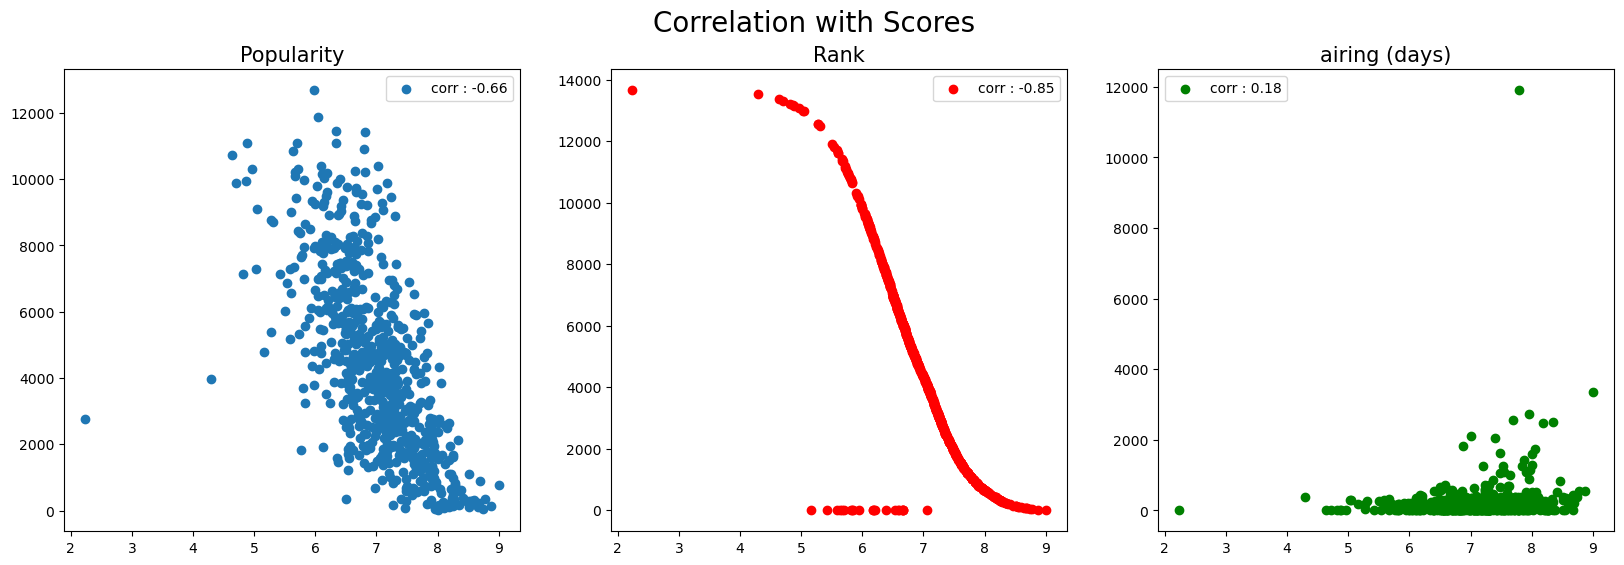

In [529]:
corr_pop = all_df['score'].corr(all_df['popularity']).round(2)
corr_rank = all_df['score'].corr(all_df['rank']).round(2)
corr_airing = all_df['score'].corr(all_df['airing (days)']).round(2)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(all_df['score'], all_df['popularity'], label=f'corr : {corr_pop}')
plt.suptitle("Correlation with Scores", fontsize=20)
plt.title("Popularity", fontsize=15)
plt.legend()

plt.subplot(1,3,2)
plt.scatter(all_df['score'], all_df['rank'], label=f'corr : {corr_rank}', color="r")
plt.title("Rank", fontsize=15)
plt.legend()

plt.subplot(1,3,3)
plt.scatter(all_df['score'], all_df['airing (days)'], label=f'corr : {corr_airing}', color="g")
plt.title('airing (days)', fontsize=15)
plt.legend()

plt.show()

### Insights
* **As I expected, the higher the score an anime has, the more popular it is. (Strong negative correlation with Popularity and Rank)**
* **I expected that the longer the airing period an anime has, the more popular it is, but it is not correlated with the scores.**

### Top 10 Animes based on Score

In [840]:
anime_df.sort_values(by='score', ascending=False).reset_index(drop=True).head(10)

,title,type,source,genre,episodes,airing period,duration,score,rank,popularity
0,Ginga Eiyuu Densetsu,OVA,Novel,Drama,110,"Jan 8, 1988 to Mar 17, 1997",26 min per ep,9.01,12,757
1,Monster,TV,Manga,Drama,74,"Apr 7, 2004 to Sep 28, 2005",24 min per ep,8.88,24,126
2,Hajime no Ippo,TV,Manga,Sports,75,"Oct 4, 2000 to Mar 27, 2002",23 min per ep,8.77,43,363
3,Cowboy Bebop,TV,Original,Action,26,"Apr 3, 1998 to Apr 24, 1999",24 min per ep,8.75,49,43
4,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,OVA,Manga,Action,4,"Feb 20, 1999 to Sep 22, 1999",29 min per ep,8.70,64,906
5,Great Teacher Onizuka,TV,Manga,Comedy,43,"Jun 30, 1999 to Sep 17, 2000",25 min per ep,8.68,67,218
6,Howl no Ugoku Shiro,Movie,Novel,Adventure,1,"Nov 20, 2004",1 hr 59 min,8.67,70,100
7,Mushishi,TV,Manga,Adventure,26,"Oct 23, 2005 to Jun 19, 2006",23 min per ep,8.65,75,220
8,Kenpuu Denki Berserk,TV,Manga,Action,25,"Oct 8, 1997 to Apr 1, 1998",23 min per ep,8.59,100,310
9,Nana,TV,Manga,Drama,47,"Apr 5, 2006 to Mar 28, 2007",22 min per ep,8.56,111,299


### Top 10 Animes based on Rank

In [842]:
rank = anime_df[anime_df['rank'] != 0]
rank.sort_values(by='rank').reset_index(drop=True).head(10)

,title,type,source,genre,episodes,airing period,duration,score,rank,popularity
0,Ginga Eiyuu Densetsu,OVA,Novel,Drama,110,"Jan 8, 1988 to Mar 17, 1997",26 min per ep,9.01,12,757
1,Monster,TV,Manga,Drama,74,"Apr 7, 2004 to Sep 28, 2005",24 min per ep,8.88,24,126
2,Hajime no Ippo,TV,Manga,Sports,75,"Oct 4, 2000 to Mar 27, 2002",23 min per ep,8.77,43,363
3,Cowboy Bebop,TV,Original,Action,26,"Apr 3, 1998 to Apr 24, 1999",24 min per ep,8.75,49,43
4,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,OVA,Manga,Action,4,"Feb 20, 1999 to Sep 22, 1999",29 min per ep,8.70,64,906
5,Great Teacher Onizuka,TV,Manga,Comedy,43,"Jun 30, 1999 to Sep 17, 2000",25 min per ep,8.68,67,218
6,Howl no Ugoku Shiro,Movie,Novel,Adventure,1,"Nov 20, 2004",1 hr 59 min,8.67,70,100
7,Mushishi,TV,Manga,Adventure,26,"Oct 23, 2005 to Jun 19, 2006",23 min per ep,8.65,75,220
8,Kenpuu Denki Berserk,TV,Manga,Action,25,"Oct 8, 1997 to Apr 1, 1998",23 min per ep,8.59,100,310
9,Nana,TV,Manga,Drama,47,"Apr 5, 2006 to Mar 28, 2007",22 min per ep,8.56,111,299


### Top 10 Animes based on Popularity

In [844]:
anime_df.sort_values(by='popularity').reset_index(drop=True).head(10)

,title,type,source,genre,episodes,airing period,duration,score,rank,popularity
0,Naruto,TV,Manga,Action,220,"Oct 3, 2002 to Feb 8, 2007",23 min per ep,8.00,652,9
1,Bleach,TV,Manga,Action,366,"Oct 5, 2004 to Mar 27, 2012",24 min per ep,7.96,711,36
2,Cowboy Bebop,TV,Original,Action,26,"Apr 3, 1998 to Apr 24, 1999",24 min per ep,8.75,49,43
3,Elfen Lied,TV,Manga,Action,13,"Jul 25, 2004 to Oct 17, 2004",25 min per ep,7.46,2074,77
4,Fullmetal Alchemist,TV,Manga,Action,51,"Oct 4, 2003 to Oct 2, 2004",24 min per ep,8.11,495,83
5,Howl no Ugoku Shiro,Movie,Novel,Adventure,1,"Nov 20, 2004",1 hr 59 min,8.67,70,100
6,Samurai Champloo,TV,Original,Action,26,"May 20, 2004 to Mar 19, 2005",24 min per ep,8.51,137,110
7,Dragon Ball Z,TV,Manga,Action,291,"Apr 26, 1989 to Jan 31, 1996",24 min per ep,8.19,399,114
8,Monster,TV,Manga,Drama,74,"Apr 7, 2004 to Sep 28, 2005",24 min per ep,8.88,24,126
9,Ouran Koukou Host Club,TV,Manga,Comedy,26,"Apr 5, 2006 to Sep 27, 2006",23 min per ep,8.16,441,132


### Trends in the Top 10 Anime Genres Over the Years

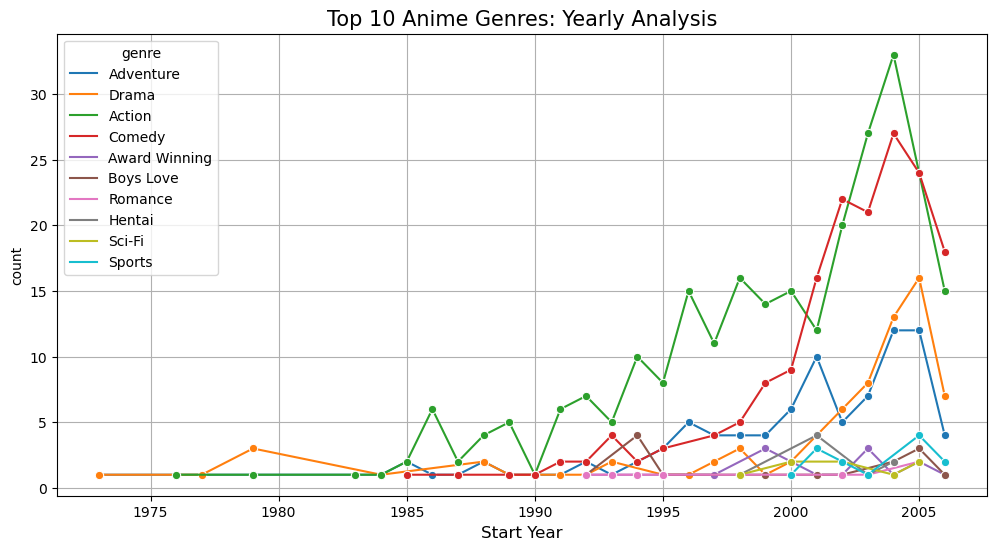

In [737]:
# Extract start year
all_df['start_year'] = all_df['start'].dt.year

genres = all_df.groupby('genre')[['genre']].count().rename(columns={'genre':'count'}).sort_values(by='count', ascending=False).head(10)
top10_genre = pd.DataFrame()
for i in genres.index:
    top10_data = all_df[all_df['genre'] == i]
    top10_genre = pd.concat([top10_genre, top10_data], axis=0)

top10 = top10_genre.groupby(['start_year', 'genre'])[['genre']].count().rename(columns={'genre':'count'}).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=top10, x='start_year', y='count', hue='genre', marker='o')
plt.title('Top 10 Anime Genres: Yearly Analysis', fontsize=15)
plt.xlabel('Start Year', fontsize=12)
plt.grid()
plt.show()

### Insights
* **Not only has the number of anime increased over the years, but the number of genres has also expanded.**
* **The number of Action and Comedy anime has notably increased over time, particularly after the year 2000.**
* **The graph indicates a decline after 2005, which is attributed to insufficient data for that period.**

### Trend in the Top 5 Anime Sources Over the Years

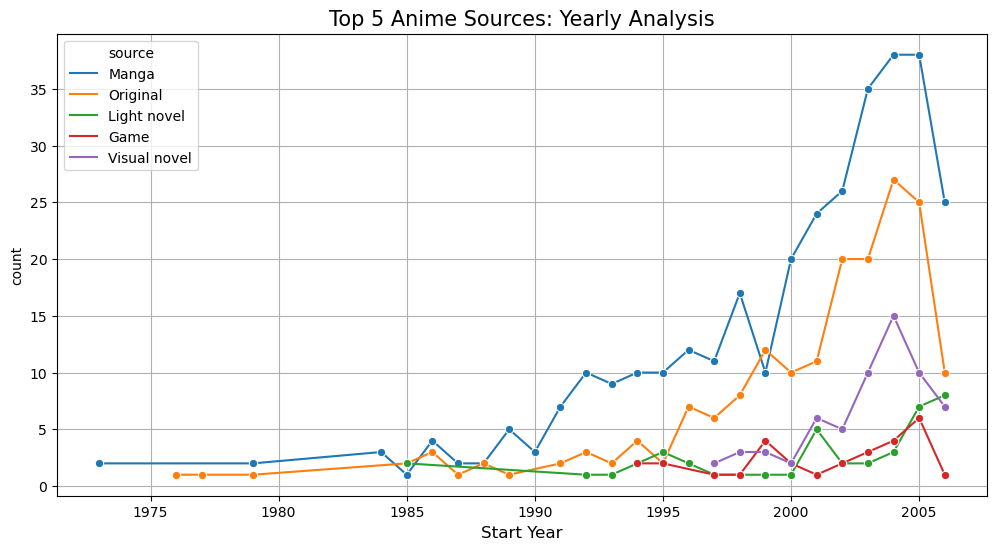

In [775]:
top5_source = all_df.groupby('source')[['source']].count().rename(columns={'source':'count'}).sort_values(by='count', ascending=False).head()
sources = top5_source.index
select_sources = all_df[all_df['source'].isin(sources)]

top5 = select_sources.groupby(['start_year', 'source'])[['source']].count().rename(columns={'source':'count'}).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=top5, x='start_year', y='count', hue='source', marker='o')
plt.title('Top 5 Anime Sources: Yearly Analysis', fontsize=15)
plt.xlabel('Start Year', fontsize=12)
plt.grid()
plt.show()

### Insights
* **I could not identify whether Manga is in paper or digital form, but the demand for Manga has been increasing.**
* **Original refers to an anime that is not based on manga, novels, or other source material. Since 1995, original anime has been increasing, which suggests that it could be a recent trend, potentially reflecting the growing tendency to build or establish new fanbases.**

### Conclusion
**Among the top 10 popular anime shows, manga is a popular source, and it is an area that is still expanding. This data could be used to decide the source of an anime based on trends and the methods of how anime is released. Additionally, since the cost and necessary items to create an anime vary depending on its source, this data would be helpful in specifying what creators need when they start creating an anime from scratch. This could include the budget required for production, the necessary staff skills and expertise, the materials and technical requirements, as well as marketing strategies and promotional activities tailored to the release methods of the anime.**